Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read dataset: winequality-red.csv

This dataset contains physiochemical properties which determine a good a wine.

select columns: density, pH , alcohol

return dataframe df_select

Tip: use read_csv() function to read csv file

In [3]:
def get_col():
  #write your code here
  file_path = '/content/drive/MyDrive/Everything UMB/FA23/CS470/winequality-red.csv'
  df = pd.read_csv(file_path)
  columns_to_select = ['density', 'pH', 'alcohol']
  df_select = df[columns_to_select]
  #######
  return df_select
df_select=get_col()
#print(df_select)

Normalizing data using min max normalization

Tip: use dataframe.min() and dataframe.max()

In [4]:
def norm_data(df_select):
  #write your code here
  min_values = df_select.min()
  max_values = df_select.max()
  # print(min_values, max_values, df_select)
  # print(max_values)
  normalized_df = (df_select-min_values)/(max_values-min_values)
  ###########
  return normalized_df
normalized_df=norm_data(df_select)
#print(normalized_df)

KMeans algorithm classifies the data points into given number of classes

write a code to classify data into 3 classes using KMeans library.

Write a code to plot all the classes in the same graph, the graph should be a 3D plot.

Tip: use figure.add_subplot() and scatter()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


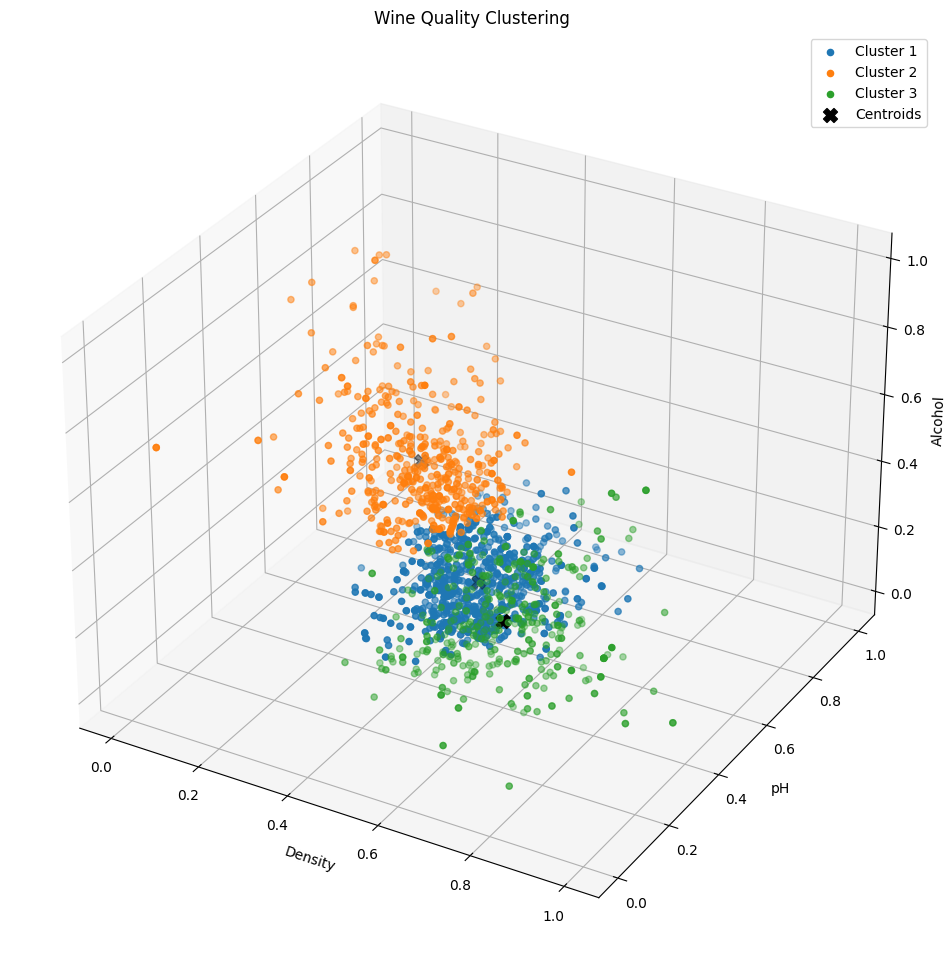

In [6]:
def classify(normalized_df):
  #write your code here
  K = 3
  # n_init = 4 # this was supposed to suppress a warning
  kmeans = KMeans(n_clusters=K, init = "random")
  kmeans.fit(normalized_df)
  labels = kmeans.labels_
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(K):
    ax.scatter(normalized_df[labels == i]['density'],
               normalized_df[labels == i]['pH'],
               normalized_df[labels == i]['alcohol'],
               label=f'Cluster {i + 1}'
               )
  cluster_centers = kmeans.cluster_centers_
  ax.scatter(
          cluster_centers[:, 0],
          cluster_centers[:, 1],
          cluster_centers[:, 2],
          c='black',
          marker='X',
          s=100,
          label='Centroids'
      )
  ax.set_xlabel('Density')
  ax.set_ylabel('pH')
  ax.set_zlabel('Alcohol')
  ax.legend()
  ax.set_title('Wine Quality Clustering')
  plt.show()
  #############
  return normalized_df
normalized_df=classify(normalized_df)